In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dansbecker/urban-and-rural-photos")

print("Path to dataset files:", path)

100%|██████████| 6.15M/6.15M [00:00<00:00, 61.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dansbecker/urban-and-rural-photos/versions/2


In [6]:
!cp -r /root/.cache/kagglehub/datasets/dansbecker/urban-and-rural-photos/versions/2 /content

In [77]:
from keras.applications.resnet50 import ResNet50
from keras import Sequential
from keras.layers import Dense, Flatten

In [78]:
base_model = ResNet50(weights='imagenet', include_top=False)

In [79]:
model = Sequential()

In [80]:
from keras.applications.resnet50 import ResNet50
from keras import Sequential
from keras.layers import Dense, Flatten, Input

# Define input shape explicitly
input_shape = (224, 224, 3)  # Adjust if your images have different dimensions

# Create the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Create the Sequential model with an Input layer
model = Sequential()
model.add(Input(shape=input_shape))  # Add an Input layer to define the input shape
model.add(base_model)
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [81]:
model.layers[0].trainable = False

In [82]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │       200,706 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [83]:
model.layers[0]

<Functional name=resnet50, built=True>

In [84]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
!pwd

/content


In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/2/train'
val_data_dir = '/content/2/val'  # Path to the validation data directory
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
     rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness between 80% and 120%
    zoom_range=[0.8, 1.2],  # Zoom in or out between 80% and 120%
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create validation data generator
val_datagen = ImageDataGenerator()  # Only rescale for validation

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


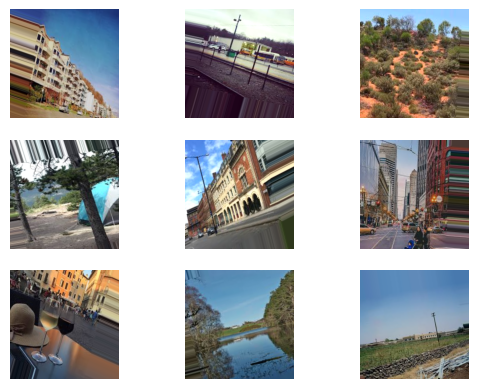

In [88]:
import matplotlib.pyplot as plt

augmented_images, labels = next(train_generator)

# Normalize pixel values to 0-1
augmented_images = augmented_images / 255.0  # If your images are in the range of 0-255

# Display a few augmented images
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')

plt.show()

In [89]:
augmented_images.shape

(32, 224, 224, 3)

In [98]:
model.fit(train_generator,validation_data=val_generator, steps_per_epoch= 10 , epochs = 10)

Epoch 1/10
 3/10 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 1.0000 - loss: 2.7871e-09

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 1.0000 - loss: 1.9951e-09 - val_accuracy: 0.9500 - val_loss: 0.1937
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9833 - loss: 0.1192 - val_accuracy: 0.9500 - val_loss: 0.1066
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.0523
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9889 - loss: 0.0630 - val_accuracy: 1.000

In [99]:
import numpy as np
np.argmax(model.predict(val_generator), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [100]:
val_generator.index_array

array([ 1, 15, 13, 18,  4,  5, 12, 17,  0,  9,  2,  3, 19,  6,  7, 11, 14,
        8, 10, 16])

In [101]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Get true labels from the validation generator
y_true = val_generator.classes

# Predict labels for the validation data
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy :",accuracy_score(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Confusion Matrix:
[[6 4]
 [5 5]]
Accuracy : 0.55


In [70]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Get true labels from the validation generator
y_true = val_generator.classes

# Predict labels for the validation data
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy :",accuracy_score(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Confusion Matrix:
[[4 6]
 [6 4]]
Accuracy : 0.4
